In [1]:
# manchine models

# Logistic regression
# KNN-Knearest neighbour
# SVM-Support vector manchines
# Naive bayesDecission treee
# random foresy confusion matrices


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# control display
pd.options.display.max_columns=50
sns.set(style = 'darkgrid', rc = {'axes.facecolor':'#616E7C'})

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
#  cp=chest pain
# trestbps=resting blood pressure
# chol=cholesterol
# fbs=fasting blood sugar
# restecg=resting electocardiography
# exang=exercise induces againa
# oldpeak=ST depresion induced
# slope=the slope of the


In [5]:
# Logistic regression-predict one or more possible outcomes(usually represented as 0 and 1)
# column target
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [6]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


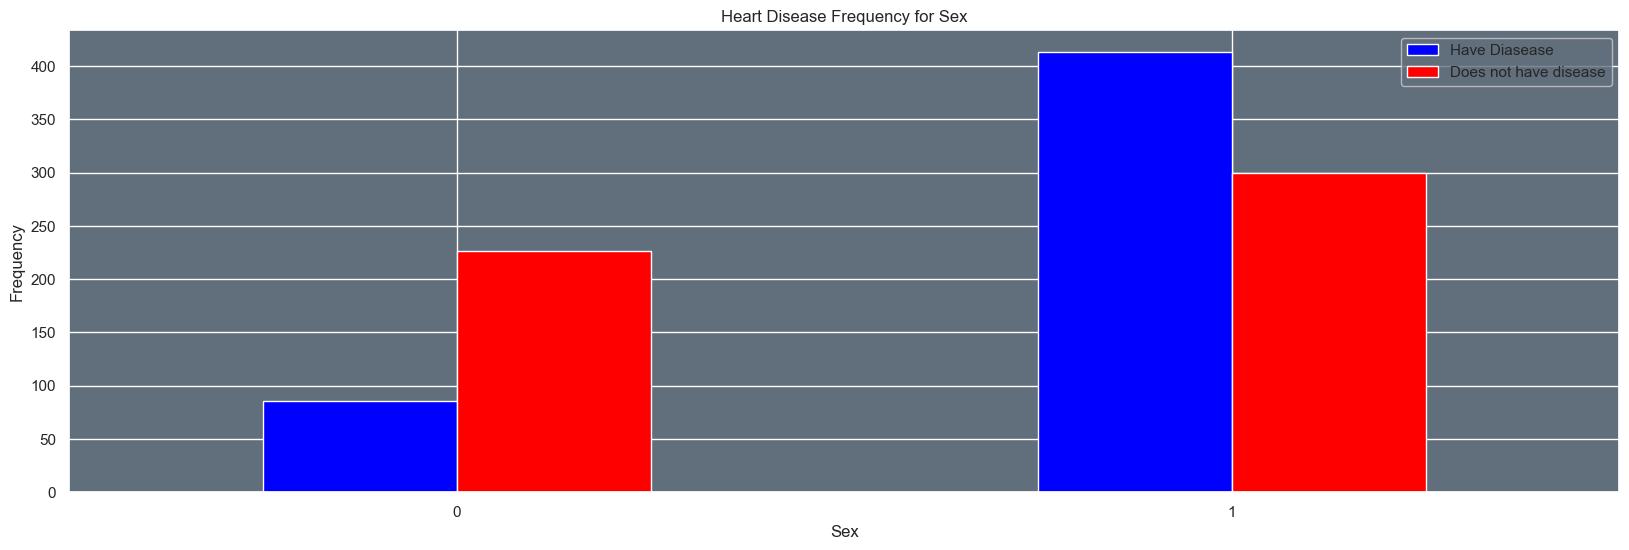

In [7]:
# Data Visualization of Heart Disease Frequency for sex
pd.crosstab(df.sex, df.target).plot(kind= 'bar', figsize= (20, 6), color=['blue', 'red'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.legend(['Have Diasease', 'Does not have disease'])
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

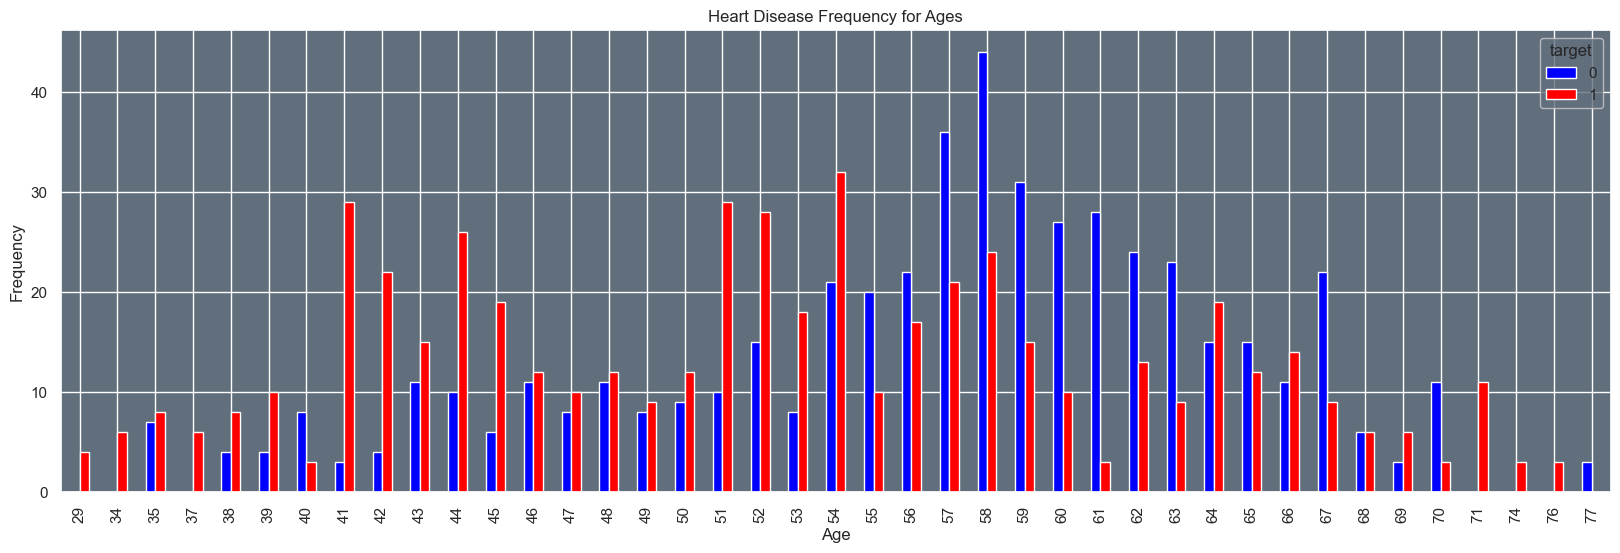

In [8]:
#Barplot showing heart disease frequency of age
pd.crosstab(df.age, df.target).plot(kind= 'bar', figsize= (20, 6), color =['blue', 'red'])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

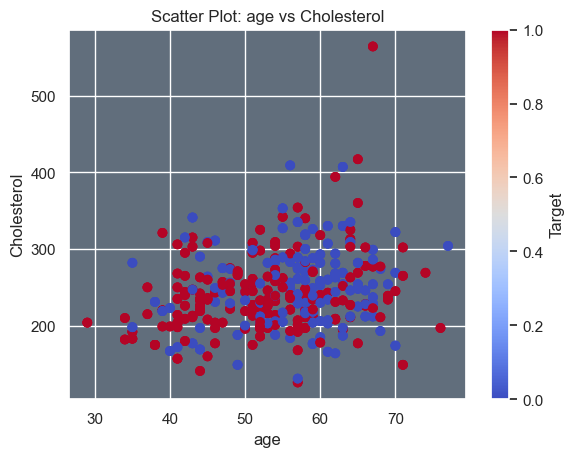

In [9]:
#Scatterplot 
age = df['age']
chol = df['chol']

# Create scatter plot
plt.scatter(age, chol, c=df['target'], cmap='coolwarm')
plt.xlabel('age')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot: age vs Cholesterol')
plt.colorbar(label='Target')
plt.show()

In [10]:
# Logistic regression-helps to solve problems with classification 
# crate independent and dependent variables
y=df.target.values
x_data=df.drop(['target'],axis=1 )

## Normalizing data

In [11]:
x=(x_data-np.min(x_data))/(np.max(x_data))-np.min(x_data)

In [12]:
# splitting data
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
#  matrices
x_train=x_train.T
y_train=y_train.T
x_test=x_test.T
y_test=y_test.T

## accuracy

In [14]:
accuracies={}
lr=LogisticRegression()
lr.fit(x_train.T, y_train.T)
acc=lr.score(x_test.T,y_test.T)*100

accuracies['LogisticRegression']=acc

print('Test Accurancy {:.2f}%'.format(acc) )


Test Accurancy 86.83%


In [15]:
# KNN

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train.T, y_train.T)

prediction = knn.predict(x_test.T)

print('{} NN Score: {:.2f}%'.format(2, knn.score(x_test.T, y_test.T) * 100))


2 NN Score: 100.00%


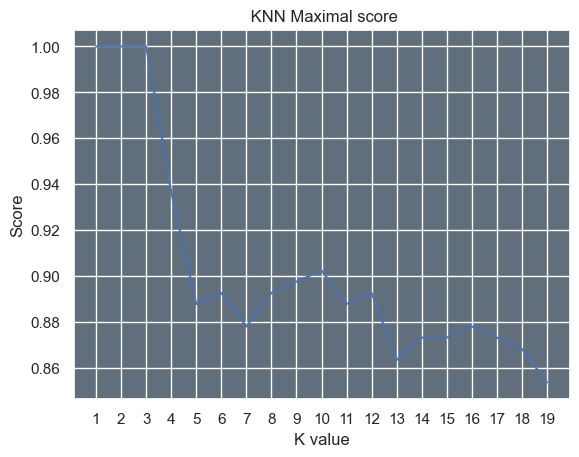

Maximum KNN score is 100.00% with k=1


In [16]:
# get maximum KNN score for the model
# score_list=[]
# for i in range(1,20):
#     knn2=KNeighborsClassifier(n_neighbors=1)# get n_neighbours means k
#     knn2.fit(x_train.T,y_train.T)
#     score_list.append(knn2.score(x_test.T,y_test.T))
    
#     # show using line plot
#     plt.plot(range(1,20),score_list)
#     plt.xtics(np.arange(1,20,1))
#     plt.xlabel('K value')
#     plt.ylabel('Score')
#     plt.title('Maximal KNN score')
#     plt.show()
#     # in %tage
#     acc=max(score_list) *100
#     accurancies['KNN']=acc
#     print('Maximum KNN score is {:.2f}%'.format(acc))

score_list = []

x_train = x_train.T  
y_train = y_train.T  
x_test = x_test.T   
y_test = y_test.T    

for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)  # Fit the model with the current value of k
    score = knn.score(x_test, y_test)
    score_list.append(score)
    
color = ['red']

# Plot the scores after the loop (outside the loop)
plt.plot(range(1, 20), score_list)
plt.xticks(np.arange(1, 20, 1))
plt.xlabel('K value')
plt.ylabel('Score')
plt.title(' KNN Maximal score')
plt.show()

# percentage
accuracies = {k: score * 100 for k, score in enumerate(score_list, start=1)}
best_k = max(accuracies, key=accuracies.get)
print('Maximum KNN score is {:.2f}% with k={}'.format(accuracies[best_k], best_k))


In [17]:

from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train, y_train)  # Do not transpose the data when fitting the model

acc = svm.score(x_test, y_test) * 100
accuracies['SVM'] = acc
print('Test accuracy of SVM: {:.2f}%'.format(acc))




Test accuracy of SVM: 52.20%


## Naive Bayes

In [18]:

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)  # Do not transpose the data when fitting the model

acc = nb.score(x_test, y_test) * 100
accuracies['Naive Bayes'] = acc
print('Accuracy of Naive Bayes: {:.2f}%'.format(acc))


Accuracy of Naive Bayes: 85.37%


## Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

acc = dt.score(x_test, y_test) * 100
accuracies['Decision Tree'] = acc
print('Decision Tree Test Accuracy: {:.2f}%'.format(acc))


Decision Tree Test Accuracy: 100.00%


## Random Forest Classification 

In [20]:
# Getting accuracy using random forest classification Algorithm
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000,random_state=1)
rf.fit(x_train,y_train)

acc = dt.score(x_test, y_test) * 100
accuracies['Random Forest'] = acc
print('Random forest Test Accuracy: {:.2f}%'.format(acc))


Random forest Test Accuracy: 100.00%


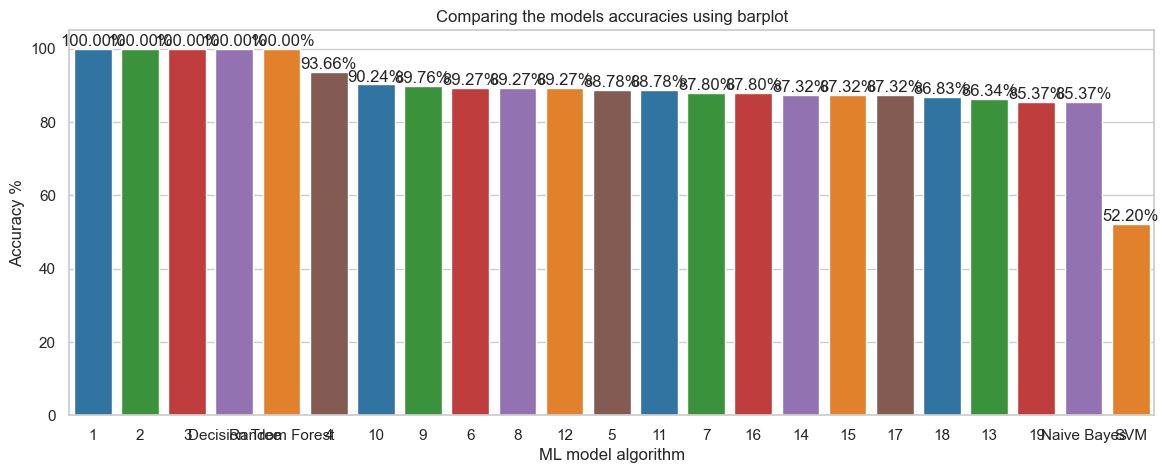

In [22]:
# Sort the accuracies dictionary by values in descending order
sorted_accuracies = {k: v for k, v in sorted(accuracies.items(), key=lambda item: item[1], reverse=True)}


colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#ff7f0e', '#8c564b']

sns.set_style('whitegrid')
plt.figure(figsize=(14, 5))
plt.title("Comparing the models accuracies using barplot")
plt.ylabel('Accuracy %')
plt.xlabel('ML model algorithm')

# Use the sorted accuracies dictionary for plotting
barplot = sns.barplot(x=list(sorted_accuracies.keys()), y=list(sorted_accuracies.values()), palette=colors)

# Annotate each bar with its corresponding accuracy value
for index, value in enumerate(sorted_accuracies.values()):
    barplot.text(index, value, '{:.2f}%'.format(value), ha="center", va="bottom")

plt.show()


## confusion matrix

In [23]:

y_head_lr=lr.predict(x_test)
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train,y_train)

y_head_knn=knn3.predict(x_test)
y_head_svm=svm.predict(x_test)
y_head_nb=nb.predict(x_test)
y_head_dtc=dt.predict(x_test)
y_head_rf=rf.predict(x_test)


In [24]:

from sklearn.metrics import confusion_matrix

cm_lr=confusion_matrix(y_test,y_head_lr)
cm_knn=confusion_matrix(y_test,y_head_knn)
cm_svm=confusion_matrix(y_test,y_head_svm)
cm_nb=confusion_matrix(y_test,y_head_nb)
cm_dtc=confusion_matrix(y_test,y_head_dtc)
cm_rf=confusion_matrix(y_test,y_head_rf)

## HeatMap

<function matplotlib.pyplot.show(close=None, block=None)>

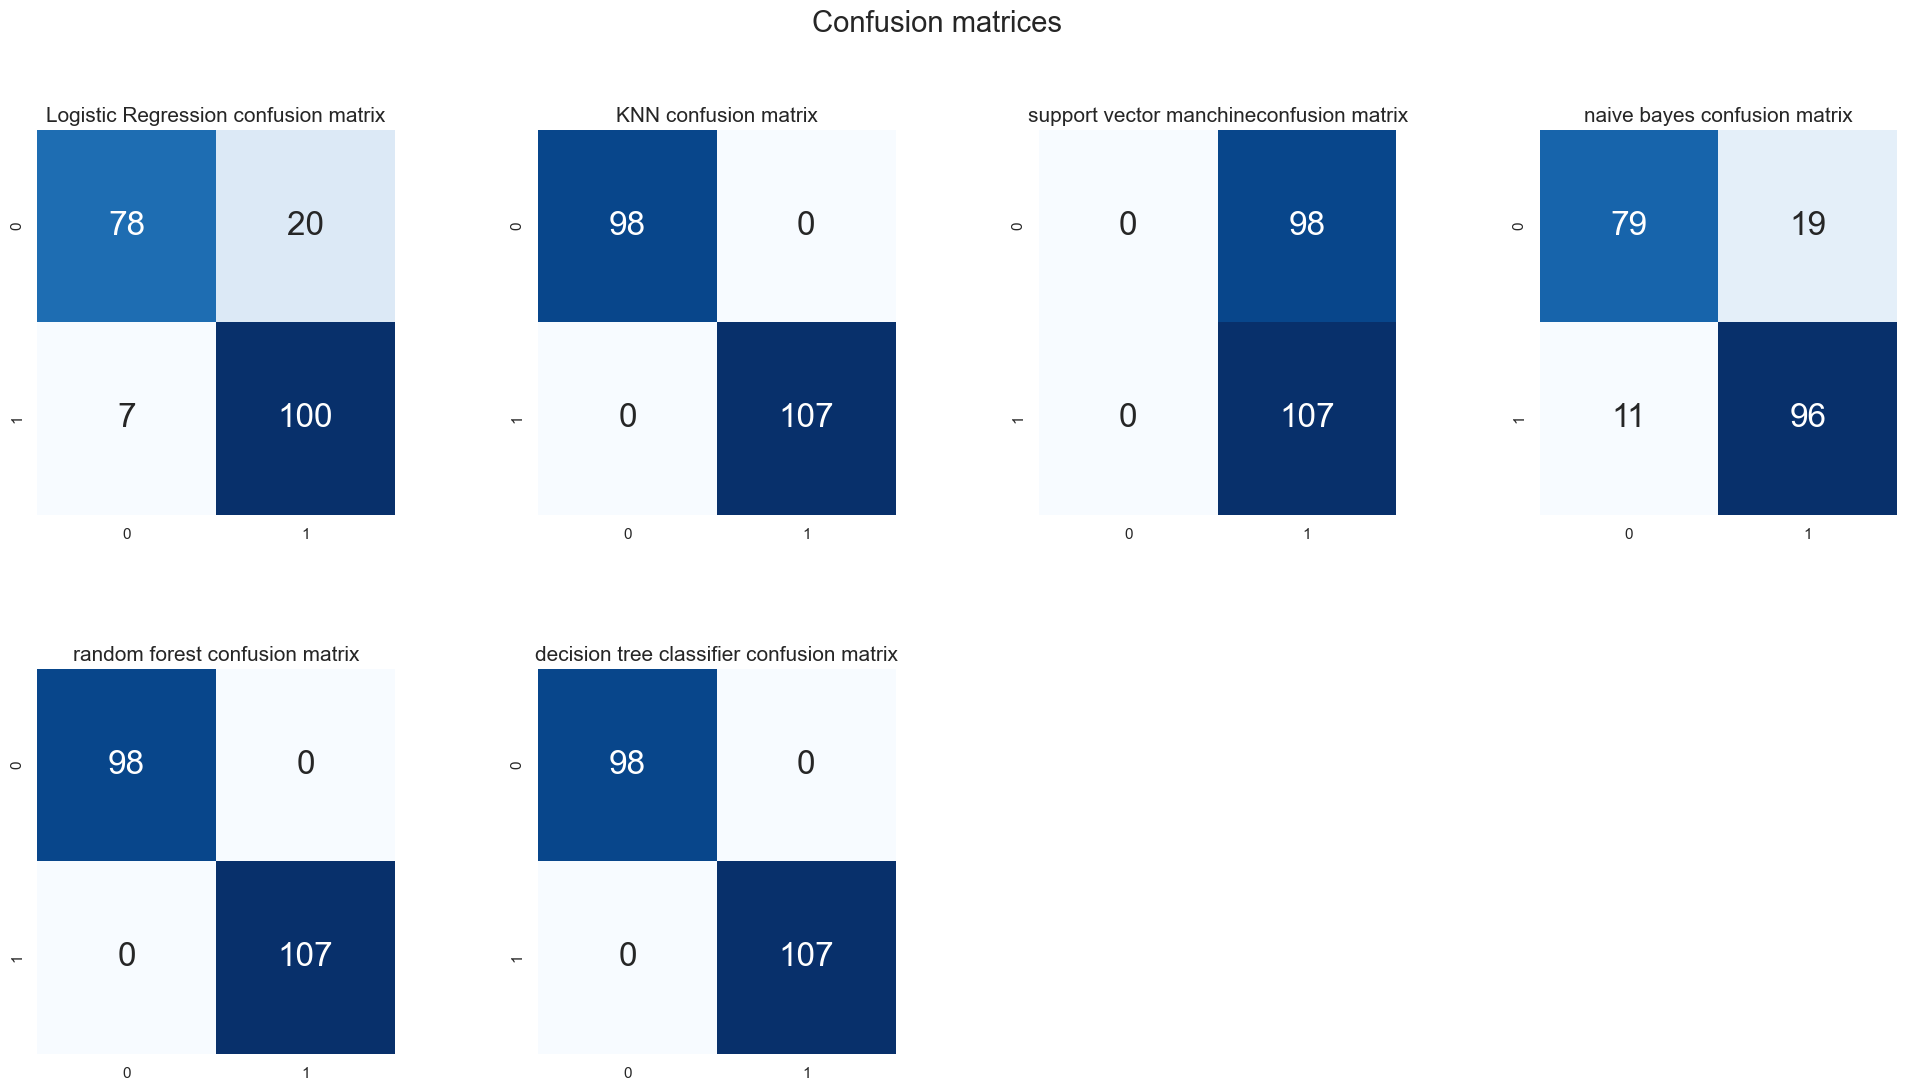

In [25]:
plt.figure(figsize=(24, 12))
plt.suptitle('Confusion matrices', fontsize=21)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# CONFUSION MAATRIX FOR LRGISTIC REGRESSION
plt.subplot(2, 4, 1)
plt.title('Logistic Regression confusion matrix', fontsize=15)
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})

# FOR KNN 
plt.subplot(2, 4, 2)
plt.title('KNN confusion matrix', fontsize=15)
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})

# FOR Support vector manchine
plt.subplot(2, 4, 3)
plt.title('support vector manchineconfusion matrix', fontsize=15)
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})

# For naive bayes
plt.subplot(2, 4, 4)
plt.title('naive bayes confusion matrix', fontsize=15)
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})

# For random forest
plt.subplot(2, 4, 5)
plt.title('random forest confusion matrix', fontsize=15)
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})
# for decision tree KNeighborsClassifier
plt.subplot(2, 4, 6)
plt.title('decision tree classifier confusion matrix', fontsize=15)
sns.heatmap(cm_dtc, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})

plt.show
